In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_LR\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002-150-5-0.5_AR1.e-1_VG0_OL0\\KLD.csv'
df_KLD = pd.read_csv(filename)

In [3]:
boundaries = 149 + np.arange(5) * 150

### *Plot the KL divergence.*

Text(0.1, 0.9, '(a)')

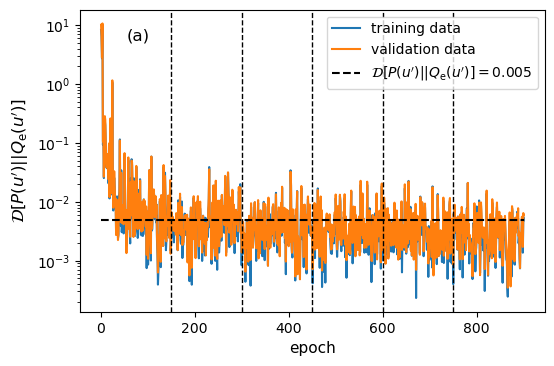

In [4]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]$', fontsize=12)

plt.plot(df_KLD.index+1, df_KLD['KLD_train'], label='training data')
plt.plot(df_KLD.index+1, df_KLD['KLD_dev'], label='validation data')

# The line $\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$
plt.plot([1,900], [5.e-3,5.e-3], '--k', label='$\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$')

plt.legend()

ymin, ymax = plt.gca().get_ylim()

for boundary in boundaries:
    plt.plot([boundary+1, boundary+1], [ymin, ymax], '--k', lw=1)

plt.ylim(ymin, ymax)

plt.annotate('(a)', (0.1, 0.9), xycoords='axes fraction', fontsize=12)

Text(0.1, 0.9, '(b)')

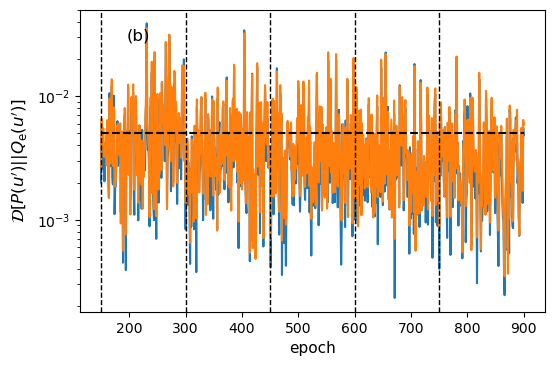

In [5]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]$', fontsize=12)

plt.plot(df_KLD.index[149:]+1, df_KLD['KLD_train'][149:], label='training data')
plt.plot(df_KLD.index[149:]+1, df_KLD['KLD_dev'][149:], label='validation data')

# The line $\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$
plt.plot([150,900], [5.e-3,5.e-3], '--k', label='$\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$')

ymin, ymax = plt.gca().get_ylim()

for boundary in boundaries:
    plt.plot([boundary+1, boundary+1], [ymin, ymax], '--k', lw=1)

plt.ylim(ymin, ymax)

plt.annotate('(b)', (0.1, 0.9), xycoords='axes fraction', fontsize=12)

### *Plot the smoothed divergence.*

In [6]:
# Tensorboard smooth function in python
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [7]:
weight = 0.95
KLD_train_smoothed = smooth(df_KLD['KLD_train'], weight)
KLD_dev_smoothed = smooth(df_KLD['KLD_dev'], weight)

Text(0.1, 0.9, '(a) $w=0.95$')

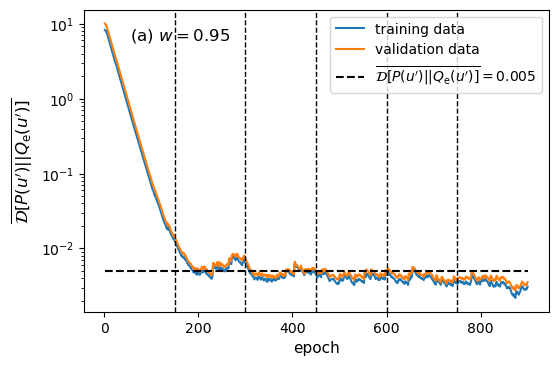

In [8]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\overline{\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]}$', fontsize=12)

plt.plot(df_KLD.index+1, KLD_train_smoothed, label='training data')
plt.plot(df_KLD.index+1, KLD_dev_smoothed, label='validation data')

# The line $\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$
plt.plot([1,900], [5.e-3,5.e-3], '--k', label='$\overline{\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]}=0.005$')

plt.legend()

ymin, ymax = plt.gca().get_ylim()

for boundary in boundaries:
    plt.plot([boundary+1, boundary+1], [ymin, ymax], '--k', lw=1)

plt.ylim(ymin, ymax)

plt.annotate('(a) $w=0.95$', (0.1, 0.9), xycoords='axes fraction', fontsize=12)

Text(0.1, 0.9, '(b) $w=0.95$')

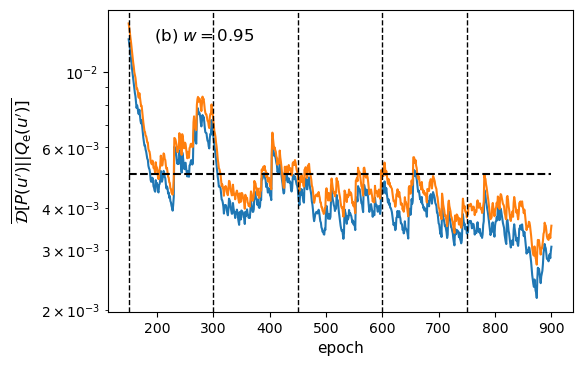

In [9]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\overline{\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]}$', fontsize=12)

plt.plot(df_KLD.index[149:]+1, KLD_train_smoothed[149:], label='training data')
plt.plot(df_KLD.index[149:]+1, KLD_dev_smoothed[149:], label='validation data')

# The line $\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$
plt.plot([150,900], [5.e-3,5.e-3], '--k', label='$\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$')

ymin, ymax = plt.gca().get_ylim()

for boundary in boundaries:
    plt.plot([boundary+1, boundary+1], [ymin, ymax], '--k', lw=1)

plt.ylim(ymin, ymax)

plt.annotate('(b) $w=0.95$', (0.1, 0.9), xycoords='axes fraction', fontsize=12)

### *Calculate the mean and standard deviation of the KL divergence over different epoch ranges.*

In [10]:
edges = [0]
for i in range(5):
    edges.append(149 + i * 150)
edges.append(900)

In [11]:
KLD_train_mean, KLD_train_std = [], []
for i in range(len(edges)-1):
    KLD_train_mean.append( np.mean(df_KLD['KLD_train'][ edges[i]:edges[i+1] ]) )
    KLD_train_std.append( np.std(df_KLD['KLD_train'][ edges[i]:edges[i+1] ]) )

KLD_dev_mean, KLD_dev_std = [], []
for i in range(len(edges)-1):
    KLD_dev_mean.append( np.mean(df_KLD['KLD_dev'][ edges[i]:edges[i+1] ]) )
    KLD_dev_std.append( np.std(df_KLD['KLD_dev'][ edges[i]:edges[i+1] ]) )

Text(0.12, 0.9, 'errorbar: $\\sigma(\\mathcal{D}[P(u^\\prime)||Q_{\\mathrm{e}}(u^\\prime)])$')

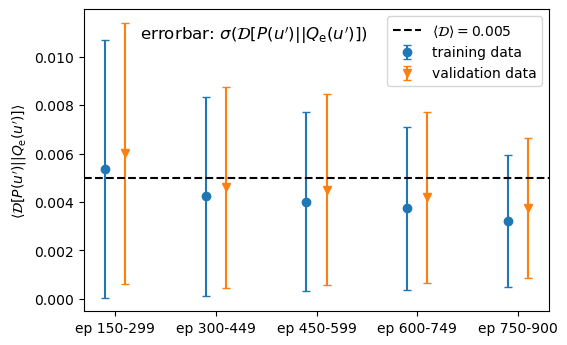

In [12]:
ticks = np.arange(len(edges)-1)
labels = ['ep 1-149', 'ep 150-299', 'ep 300-449', 'ep 450-599', 'ep 600-749', 'ep 750-900']

plt.figure(figsize=(6,4), dpi=100)
plt.ylabel(r'$\langle\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]\rangle$')
plt.xticks(ticks, labels)

plt.errorbar(ticks[1:]-0.1, KLD_train_mean[1:], yerr=KLD_train_std[1:], fmt='o', capsize=3, label='training data')
plt.errorbar(ticks[1:]+0.1, KLD_dev_mean[1:], yerr=KLD_dev_std[1:], fmt='v', capsize=3, label='validation data')

# The line $\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$
xmin, xmax = plt.gca().get_xlim()
plt.plot([xmin,xmax], [5.e-3,5.e-3], '--k', label=r'$\langle\mathcal{D}\rangle=0.005$')
plt.xlim(xmin, xmax)

plt.legend()

plt.annotate('errorbar: $\sigma(\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)])$', (0.12, 0.9), xycoords='axes fraction', fontsize=12)

### *Find the checkpoint with KL divergence nearest to its mean in different epoch ranges.*

In [13]:
ckpt = []
for i in range(len(edges)-1):
    ckpt.append(
        edges[i] + np.argmin( np.abs(df_KLD['KLD_dev'][ edges[i]:edges[i+1] ] - KLD_dev_mean[i]) )
    )
print('ckpt =', ckpt)
print('KLD_dev =', KLD_dev_mean)

ckpt = [9, 180, 410, 468, 748, 814]
KLD_dev = [0.234051384301585, 0.006003641554521804, 0.0046046205195592205, 0.004503808017047112, 0.0041892814713552495, 0.0037499043114658584]


### *Plot PDFs of velocity.*

In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [15]:
gap_dev_pred, discrim_fake_output_dev = [], []

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_LR\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002-150-5-0.5_AR1.e-1_VG0_OL0\\prediction\\ckpt.181.h5'
with h5py.File(filename, 'r') as h5f:
    context_dev = np.array(h5f.get('context_dev'))           # context data
    gap_dev = np.array(h5f.get('gap_dev'))                   # true gap data
    gap_dev_pred.append( np.array(h5f.get('gap_dev_pred')) ) # predicted gap data

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_LR\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002-150-5-0.5_AR1.e-1_VG0_OL0\\prediction\\ckpt.411.h5'
with h5py.File(filename, 'r') as h5f:
    gap_dev_pred.append( np.array(h5f.get('gap_dev_pred')) ) # predicted gap data

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_LR\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002-150-5-0.5_AR1.e-1_VG0_OL0\\prediction\\ckpt.469.h5'
with h5py.File(filename, 'r') as h5f:
    gap_dev_pred.append( np.array(h5f.get('gap_dev_pred')) ) # predicted gap data

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_LR\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002-150-5-0.5_AR1.e-1_VG0_OL0\\prediction\\ckpt.749.h5'
with h5py.File(filename, 'r') as h5f:
    gap_dev_pred.append( np.array(h5f.get('gap_dev_pred')) ) # predicted gap data

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_LR\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002-150-5-0.5_AR1.e-1_VG0_OL0\\prediction\\ckpt.815.h5'
with h5py.File(filename, 'r') as h5f:
    gap_dev_pred.append( np.array(h5f.get('gap_dev_pred')) ) # predicted gap data

In [16]:
# hist_dev: P(u')
hist_dev, bin_edges = np.histogram(gap_dev, bins=100, density=True)

hist_dev_pred = [] # Q(u')
for i in range(len(gap_dev_pred)):
    hist, _ = np.histogram(gap_dev_pred[i], bins=bin_edges, density=True)
    hist_dev_pred.append(hist)

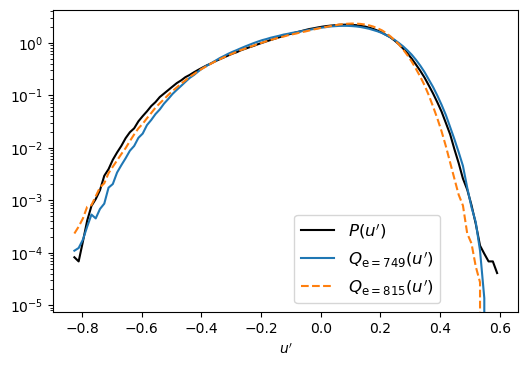

In [17]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('$u^\prime$')

plt.plot(bin_edges[0:len(hist_dev)] + 0.5*(bin_edges[1]-bin_edges[0]), hist_dev, '-k', label='$P(u^\prime)$', linewidth=1.5)

fmt = ['--', '-.', ':', '-', '--']
label = ['$Q_{\mathrm{e}=181}(u^\prime)$', '$Q_{\mathrm{e}=411}(u^\prime)$', '$Q_{\mathrm{e}=469}(u^\prime)$', '$Q_{\mathrm{e}=749}(u^\prime)$', '$Q_{\mathrm{e}=815}(u^\prime)$']

for i in range(len(gap_dev_pred)-2, len(gap_dev_pred)):
    plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist_dev_pred[i], fmt[i], label=label[i], linewidth=1.5)

plt.legend(loc='lower right', bbox_to_anchor=(0., 0., 0.85, 1.), fontsize='large')